# OBJECTIVE 1: Profile & QA the data


## Task
-Import/Open the Listings.csv file

-Cast any date columns as a datetime format

-Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’

-QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field


In [10]:
#Import/Open the Listings.csv file
#Cast any date columns as a datetime format


import pandas as pd
listings = pd.read_csv("/Users/chetz/Desktop/Portfolio/AirBNB/Listings.csv",
                       encoding = "ISO-8859-1", 
                       low_memory= False,
                      parse_dates=["host_since"])  #changing column host since's type to date and time

In [11]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [12]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [15]:
#QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

paris_listings = listings
.query("city == 'Paris'")   #filter rows
.loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]   #Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’, By using loc function I am locking the columns which I want to use

paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [17]:
#QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

paris_listings.isna().sum() #to find total numbers of missing values

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [18]:
paris_listings.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [20]:
paris_listings.query("accommodates == 0 and price == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

# OBJECTIVE 2: Prepare the data for visualization


## Task
-Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)

-Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

-Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

In [24]:
#Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)


paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price" : "mean"})
    .sort_values("price")

)

paris_listings_neighbourhood.head()   # you can use tail instead of head for highest prices.  

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [30]:
#Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)


paris_listings_accommodations = (
    paris_listings
    .query("neighbourhood == 'Elysee'")  #to filter neighbourhood which has the highest price, which is Elysee
    .groupby("accommodates")
    .agg({"price" : "mean"})
    .sort_values("price")

)
paris_listings_accommodations.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [98]:
paris_listings_accommodations.()

,price
count,16.000000
mean,436.886744
std,292.003516
min,0.000000
25%,197.847890
50%,408.528490
75%,597.218750
max,971.000000


In [34]:
#Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

paris_listings_over_time = (
    paris_listings
    .set_index("host_since")    #to indexframe data, here we are using host_since coloumn bcz it is datetime type.
    .resample("Y")              #to sample by year
    .agg({
        "neighbourhood" : "count",
        "price" : "mean"
    })
)

paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


# OBJECTIVE 3: Visualize the data and summarize findings

## Task
-Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

-Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed

-Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed

-Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?

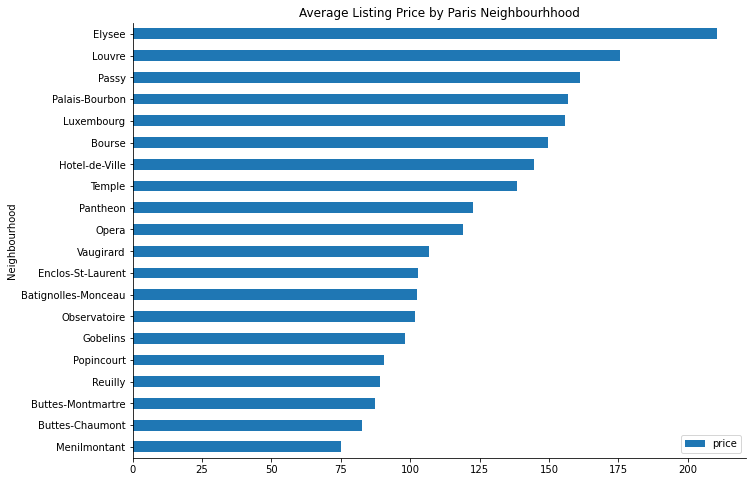

In [113]:
# Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed


import seaborn as sns
(paris_listings_neighbourhood 
.plot
.barh(figsize=(11, 8),
      ylabel = "Price",
      xlabel = "Neighbourhood",
      title = "Average Listing Price by Paris Neighbourhhood"
     
))

sns.despine()

  


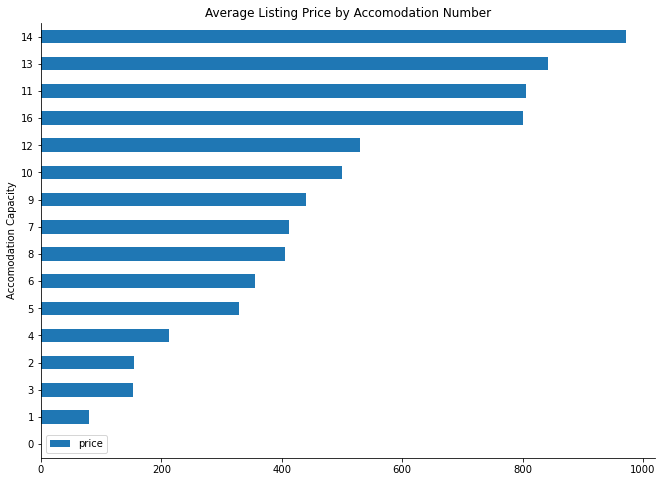

In [114]:
#Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed


(paris_listings_accommodations
.plot
.barh(figsize=(11, 8),
      ylabel = "Price",
      xlabel = "Accomodation Capacity",
      title = "Average Listing Price by Accomodation Number"
     
))

sns.despine()

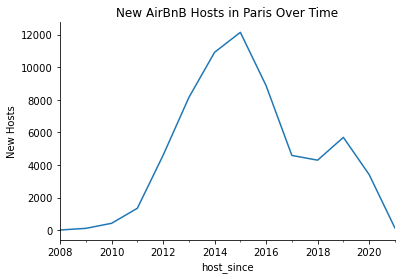

In [115]:
#Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed


paris_listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    title="New AirBnB Hosts in Paris Over Time")
sns.despine()

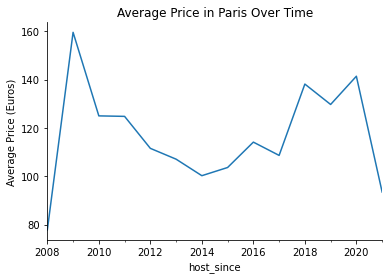

In [116]:
paris_listings_over_time["price"].plot(
    ylabel="Average Price (Euros)",
    title="Average AirBnB Price in Paris Over Time")
sns.despine()

Text(0.5, 1.0, '2015 Regulations Lead to Fewer Hosts & Higher Prices')

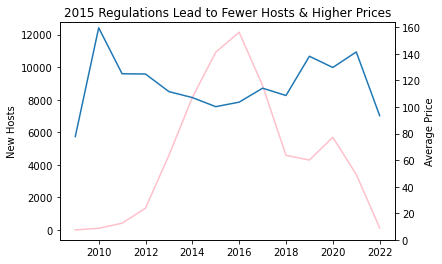

In [123]:
#Create a dual axis line chart to show both new hosts and average price over time and what insights do you have about the impact of the 2015 regulations on new hosts and prices?


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="pink"
)
ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price",
  
)
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")
ax.set_title("2015 Regulations Lead to Fewer Hosts & Higher Prices")
